In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

2025-08-02 21:42:52.870281: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-02 21:42:52.878317: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-02 21:42:53.146594: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/pratham/repos/Inkwell/venv/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow

In [4]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Print the shapes to verify
print(f"Shape of train_images: {train_images.shape}")
print(f"Shape of train_labels: {train_labels.shape}")
print(f"Shape of test_images: {test_images.shape}")
print(f"Shape of test_labels: {test_labels.shape}")

Shape of train_images: (60000, 28, 28)
Shape of train_labels: (60000,)
Shape of test_images: (10000, 28, 28)
Shape of test_labels: (10000,)


In [5]:
# Normalization
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [6]:
print('Number of images in the training dataset: ', train_images.shape[0])
print('Number of images in the testing dataset: ', test_images.shape[0])

Number of images in the training dataset:  60000
Number of images in the testing dataset:  10000


In [7]:
print(f"shape of the images in the training dataset: {train_images[0].shape}")

shape of the images in the training dataset: (28, 28)


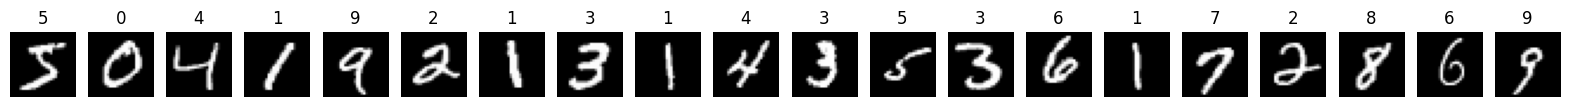

In [8]:
fig, axes = plt.subplots(1, 20, figsize=(20,20))
for i in range(20):
    axes[i].imshow(train_images[i].reshape(28,28), cmap='gray')
    axes[i].set_title(train_labels[i])
    axes[i].axis('off')
plt.show()

In [9]:
model = models.Sequential([
    layers.Flatten(input_shape=(28,28,1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/home/pratham/repos/Inkwell/venv/lib/python3.13/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-08-02 21:42:58.103266: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_images,
    train_labels,
    epochs=5
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9279 - loss: 0.2464
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9690 - loss: 0.1033
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9772 - loss: 0.0729
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9819 - loss: 0.0572
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9863 - loss: 0.0424


In [41]:
def view_classify(image, probabilities):
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(image)
    ax1.axis('off')
    ax2.barh(np.arange(10), probabilities)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_title('Class probability', color='white')
    ax2.set_xlim(0,1.1)
    ax2.tick_params(axis='x', colors='red') 
    ax2.tick_params(axis='y', colors='red')
    ax2.spines['top'].set_color('red')
    ax2.spines['bottom'].set_color('red')
    ax2.spines['left'].set_color('red')
    ax2.spines['right'].set_color('red')

    ax2.set_facecolor('black')
    fig.set_facecolor('black')
    plt.tight_layout()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


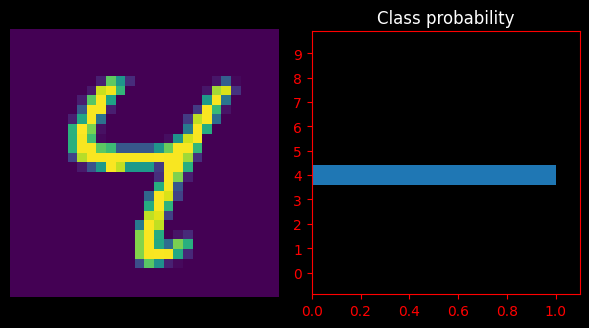

In [42]:
image, label = test_images[6], test_labels[6]
propabilities = model.predict(image.reshape(1,28,28,1))
view_classify(image, propabilities[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


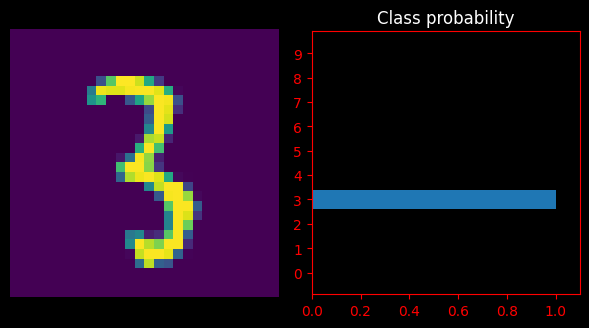

In [43]:
image2, label = test_images[669], test_labels[669]
propabilities2 = model.predict(image2.reshape(1,28,28,1))
view_classify(image2, propabilities2[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


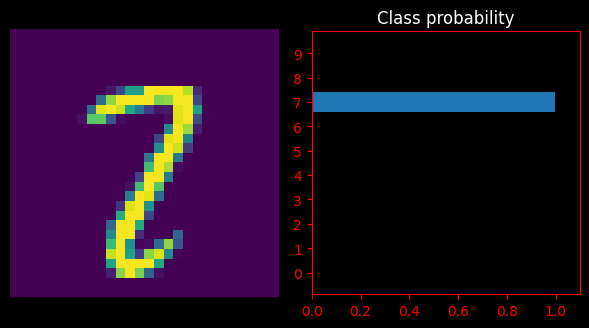

In [44]:
image3, label = test_images[321], test_labels[321]
propabilities3 = model.predict(image3.reshape(1,28,28,1))
view_classify(image3, propabilities3[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


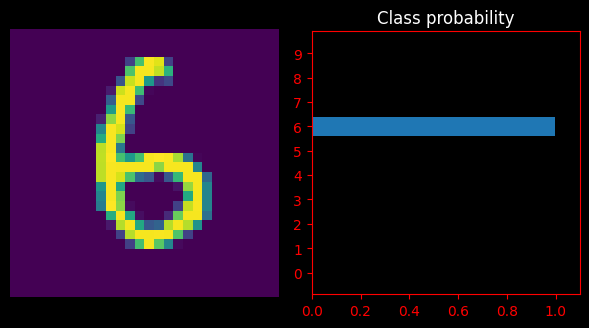

In [45]:
image4, label = test_images[21], test_labels[21]
propabilities4 = model.predict(image4.reshape(1,28,28,1))
view_classify(image4, propabilities4[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


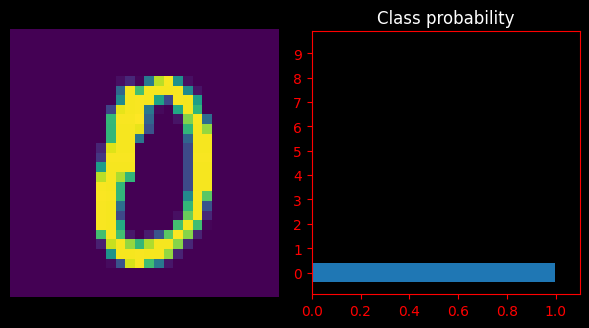

In [46]:
image5, label = test_images[55], test_labels[55]
propabilities5 = model.predict(image5.reshape(1,28,28,1))
view_classify(image5, propabilities5[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


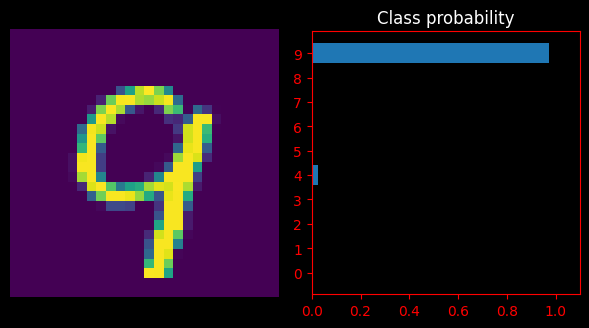

In [47]:
image6, label = test_images[16], test_labels[16]
propabilities6 = model.predict(image6.reshape(1,28,28,1))
view_classify(image6, propabilities6[0])

In [17]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Accuracy of the neural network on the {test_images.shape[0]} test images: {test_accuracy *100:.2f}%')
print(f'Loss of the neural network on the {test_images.shape[0]} test images: {test_loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9761 - loss: 0.0862
Accuracy of the neural network on the 10000 test images: 97.61%
Loss of the neural network on the 10000 test images: 0.08620552718639374
